In [5]:
library(dplyr)

# Correct the file path
file_path <- "/kaggle/input/drybeandata/Dry_Bean_Dataset.csv"  # Update this path

# Load the dataset
bean <- read.csv(file_path)

# Selecting the variables except 'Class' and abbreviating column names
X <- select(bean, -Class)
colnames(X) <- abbreviate(colnames(X), 5)

# Incorporating random variables
set.seed(1)  # Setting seed for reproducibility
n <- nrow(X)
p <- 50  # Number of total variables
s <- ncol(X)
random_data <- matrix(rnorm(n * (p - s)), n, p - s)
colnames(random_data) <- paste0("Z", 1:(p - s))
X <- cbind(X, random_data)

# Computing the correlation matrix
cor_matrix <- cor(X)


Loading required package: ggplot2



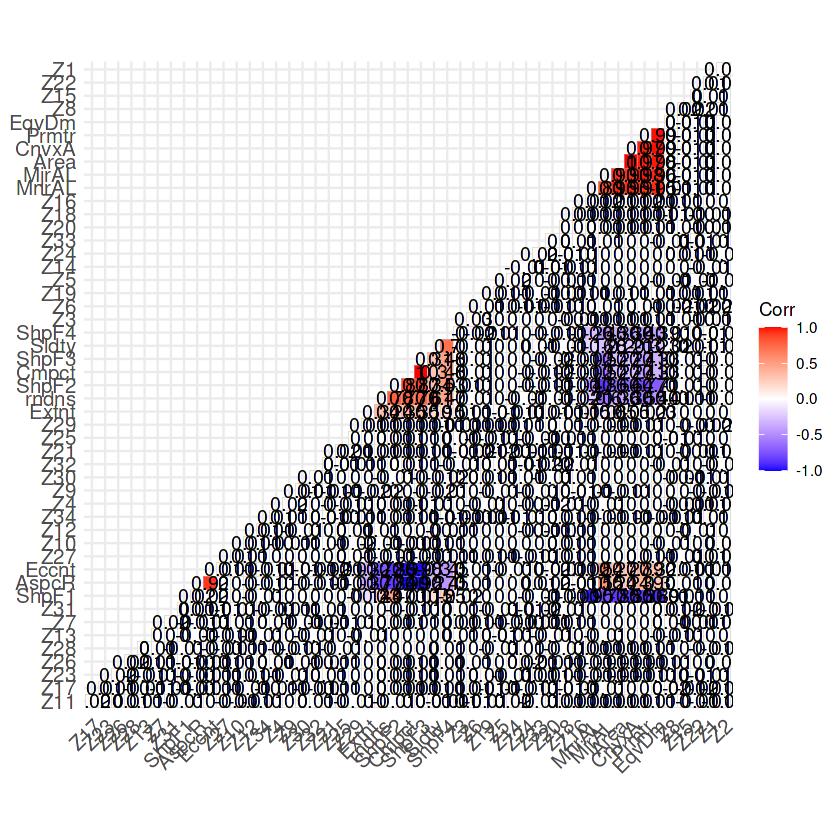

In [6]:
# Exploring correlations visually (example using ggcorrplot)
library(ggcorrplot)
ggcorrplot(cor_matrix, hc.order = TRUE, type = "lower", lab = TRUE)


In [7]:
# Creating a pairwise table (example)
library(reshape2)
pairwise_table <- melt(cor_matrix)
colnames(pairwise_table) <- c("Variable1", "Variable2", "Correlation")


In [8]:
pairwise_table$Z_Score <- atanh(pairwise_table$Correlation)
pairwise_table$P_Value <- 2 * pnorm(-abs(pairwise_table$Z_Score * sqrt(n - 3)))
pairwise_table$Significant <- pairwise_table$P_Value < 0.05



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




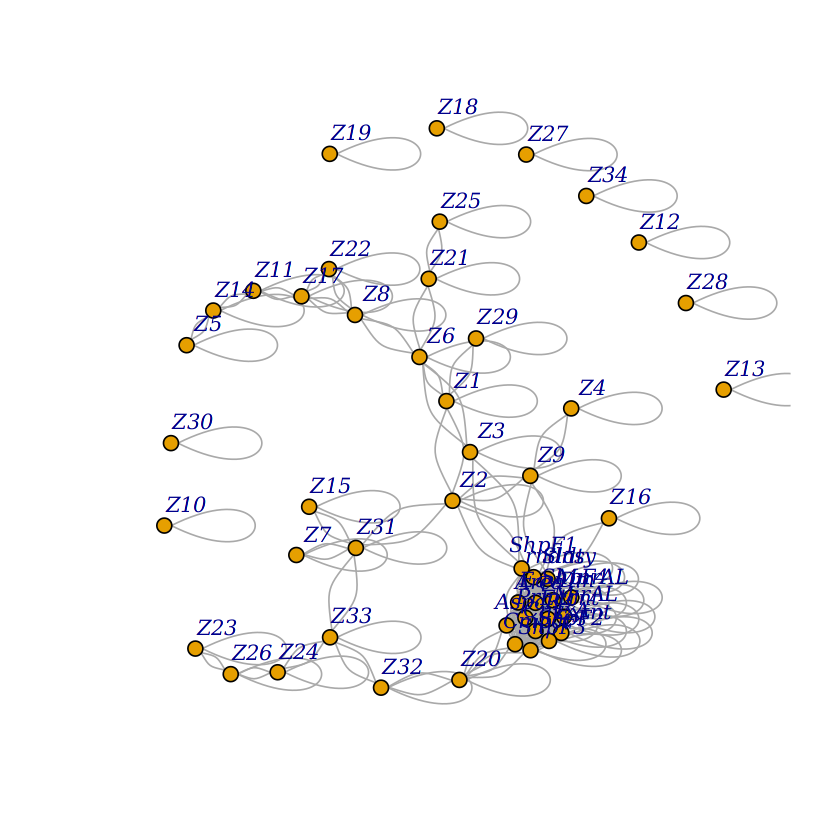

In [9]:
library(igraph)
# Filter significant correlations for network creation
significant_edges <- subset(pairwise_table, Significant)

# Create a graph from the significant edges
graph <- graph_from_data_frame(significant_edges, directed = FALSE)
plot(graph, vertex.size = 5, edge.arrow.mode = "-", vertex.label.dist = 1.5, vertex.label.font = 3)


In [10]:
# Assuming connections among original variables are true, and others are false
true_discoveries <- sum(significant_edges$Variable1 %in% colnames(bean) & significant_edges$Variable2 %in% colnames(bean))
false_discoveries <- nrow(significant_edges) - true_discoveries
FDR <- false_discoveries / nrow(significant_edges)


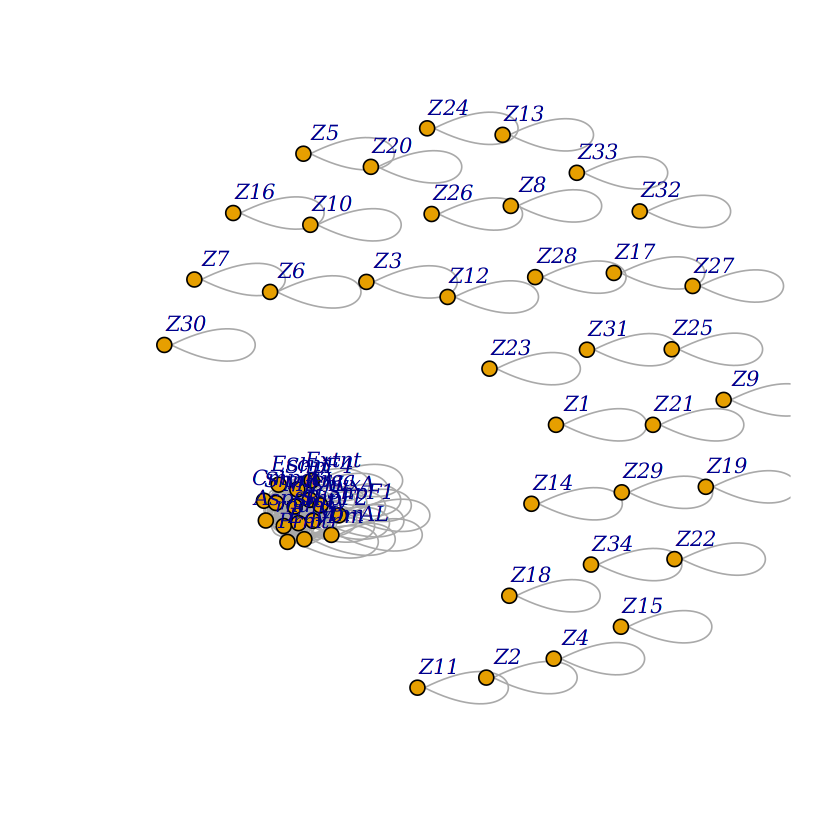

In [11]:
# Adjusting p-values
pairwise_table$Adjusted_P_Value <- p.adjust(pairwise_table$P_Value, method = "bonferroni")
pairwise_table$Significant_Adjusted <- pairwise_table$Adjusted_P_Value < 0.05

# Rebuilding the network with adjusted p-values
significant_edges_adjusted <- subset(pairwise_table, Significant_Adjusted)
graph_adjusted <- graph_from_data_frame(significant_edges_adjusted, directed = FALSE)
plot(graph_adjusted, vertex.size = 5, edge.arrow.mode = "-", vertex.label.dist = 1.5, vertex.label.font = 3)


In [12]:
# Count the total number of significant correlations before and after adjustment
total_significant_before_adjustment <- sum(pairwise_table$Significant)
total_significant_after_adjustment <- sum(pairwise_table$Significant_Adjusted)

# Count the number of edges in the adjusted network
total_edges_adjusted_network <- nrow(significant_edges_adjusted)

# Output the results
cat("Total significant correlations before adjustment:", total_significant_before_adjustment, "\n")
cat("Total significant correlations after adjustment:", total_significant_after_adjustment, "\n")
cat("Total edges in the adjusted network:", total_edges_adjusted_network, "\n")


Total significant correlations before adjustment: 344 
Total significant correlations after adjustment: 270 
Total edges in the adjusted network: 270 


In [13]:
# Assuming 'pairwise_table$Significant' was calculated before adjustment
# Count the total number of significant correlations before and after adjustment
total_significant_before_adjustment <- sum(pairwise_table$Significant)
total_significant_after_adjustment <- sum(pairwise_table$Significant_Adjusted)

# Output the results
cat("Total significant correlations before adjustment:", total_significant_before_adjustment, "\n")
cat("Total significant correlations after adjustment:", total_significant_after_adjustment, "\n")


Total significant correlations before adjustment: 344 
Total significant correlations after adjustment: 270 
